In [1]:
import datetime
now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2022-11-07 15:59:15


In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!cd /content/drive/My Drive/

/bin/bash: line 0: cd: too many arguments


In [ ]:
fname = f"/content/drive/MyDrive/BT4222/data/feature_eng_combined_v2.csv"

df = pd.read_csv(fname)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,name,artists,artist_ids,track_number,danceability,energy,key,loudness,...,rock,soft rock,southern hip hop,trap,urban contemporary,release_date,release_month,average_year_success,is_success,bert_dense_lyrics
0,0,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me,['Adele'],['4dpARuHxo51G3z768sgnrY'],1,0.604,0.366,5,-7.519,...,0,0,0,0,0,14/10/21,2021-10,38,1,0.677761
1,1,4BI4iNZigfF4SUq13TcFPh,INDUSTRY BABY - EXTENDED,"['Lil Nas X', 'Jack Harlow']","['7jVv8c5Fj3E9VhNjxT4snq', '2LIk90788K0zvyj2JJ...",2,0.732,0.708,10,-6.775,...,0,0,0,0,0,9/10/21,2021-10,27,1,0.587171
2,2,58UKC45GPNTflCN6nwCUeF,Fancy Like,['Walker Hayes'],['7sKxqpSqbIzphAKAhrqvlf'],6,0.647,0.765,1,-6.459,...,0,0,0,0,0,21/1/22,2022-01,12,1,0.616422
3,3,3rmo8F54jFF8OgYsqTxm5d,Bad Habits,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],4,0.807,0.893,11,-3.745,...,0,0,0,0,0,29/10/21,2021-10,22,1,0.596769
4,4,50nfwKoDiSYg8zOCREWAm5,Shivers,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],2,0.788,0.859,2,-2.724,...,0,0,0,0,0,29/10/21,2021-10,22,1,0.640173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56830,56830,4lCAS06lKCJiFVGhHqxCtW,Talk About It,['A Boogie Wit da Hoodie'],['31W5EY0aAly4Qieq6OFu6I'],9,0.445,0.584,1,-9.666,...,0,0,0,1,0,18/6/20,2020-06,64,1,0.597523
56831,56831,60xDmDoYJytWs5do9aHI0F,Beat the Odds,['Money Man'],['3Rx4PJ7SP6unkOk5elPUK7'],8,0.787,0.590,10,-7.123,...,0,0,1,1,0,20/3/20,2020-03,-1,0,0.596241
56832,56832,6bAHtwPD7MBjSD8UmZFsh8,Geography,"['Chaos Chaos', 'Kevin Hickey', 'Lucas McCross...","['6D6rjLdxyE5vwhMlkuQq0E', '12Cqmjoj96GR0wFIup...",1,0.522,0.788,10,-5.926,...,0,0,0,0,0,21/2/20,2020-02,-1,0,0.652086
56833,56833,0G9CL2p0TP4kTIXroDR326,twin hearts (feat. YURMS),"['ITSOKTOCRY', 'Yurms']","['2BUUAEl4BwFRA9NBDgMWSf', '2IaEQEZ606L3nZuGnm...",6,0.786,0.609,11,-6.139,...,0,0,0,0,0,6/11/20,2020-11,-1,0,0.560518


Training XGBoost

In [ ]:
from sklearn.model_selection import train_test_split

#Feature selection for training
print(df.columns)
df_model = df.copy().drop(columns=['Unnamed: 0', 'id', 'name', 'artists', 'artist_ids', 'release_date_x', 'release_date', 'date', 'lyrics', 'non_stop_lyrics', 'release_month', 'sentiment'])

#Split train and test set
X, y = df_model.drop(columns=['target']), df_model['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Index(['Unnamed: 0', 'id', 'name', 'artists', 'artist_ids', 'track_number',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'explicit', 'duration_ms', 'date', 'release_date_x', 'lyrics', 'target',
       'length_lyrics', 'unique_length_lyrics', 'title_length',
       'non_stop_lyrics', 'length_lyrics_non', 'unique_length_lyrics_non',
       'sentiment', 'positive', 'neutral', 'negative', 'compound',
       'alternative rock', 'country', 'country rock', 'dance pop', 'folk',
       'gangster rap', 'hip hop', 'indie rock', 'mellow gold', 'pop',
       'pop rap', 'pop rock', 'post-teen pop', 'r&b', 'rap', 'rock',
       'soft rock', 'southern hip hop', 'trap', 'urban contemporary',
       'release_date', 'release_month', 'average_year_success', 'is_success',
       'bert_dense_lyrics'],
      dtype='object')


In [ ]:
df_model["target"].value_counts()

0    48641
1     8194
Name: target, dtype: int64

In [ ]:
val = (df_model[df_model["target"]==1]["country"].value_counts())

In [ ]:
val[1] / (val[0] + val[1]) * 100

13.351232609226264

In [ ]:
val = (df_model[df_model["target"]==0]["country"].value_counts())

In [ ]:
val[1] / (val[0] + val[1]) * 100

2.598630784728932

Check for imbalanced class

In [ ]:
df_model["target"].value_counts()

0    48641
1     8194
Name: target, dtype: int64

Training with SMOTE oversampling minority class

In [ ]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# transform the dataset
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train_smote)
print(counter)

Counter({0: 32660, 1: 32660})


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRFClassifier
from numpy import mean
from numpy import std

model = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.882 (0.003)


In [ ]:
model.fit(X_train_smote, y_train_smote)

XGBRFClassifier(colsample_bynode=0.2, subsample=0.9)

In [ ]:
model.score(X_test, y_test)

0.8518340797611431

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score

In [ ]:
import pickle
filename = 'model_xgboost.sav'
model = pickle.load(open(f"/content/gdrive/My Drive/BT4222/{filename}", 'rb'))

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     15981
           1       0.50      0.66      0.57      2775

    accuracy                           0.85     18756
   macro avg       0.72      0.77      0.74     18756
weighted avg       0.87      0.85      0.86     18756



In [ ]:
print(f"Accuracy: {accuracy_score(y_test, predicted)}")
print(f"Precision: {precision_score(y_test, predicted)}")
print(f"Recall: {recall_score(y_test, predicted)}")
print(f"F1-score: {f1_score(y_test, predicted)}")

Accuracy: 0.8518340797611431
Precision: 0.49945054945054945
Recall: 0.6551351351351351
F1-score: 0.566796570537802


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


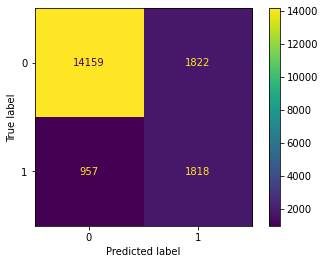

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  

Hyperparameter tuning (Needs work to split on validation set)

In [ ]:
X_train_temp, X_val_smote, y_train_temp, y_val_smote = train_test_split(X_train_smote, y_train_smote, test_size=0.33, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=XGBRFClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train_temp, y_train_temp), ( X_val_smote, y_val_smote)]
    
    clf.fit(X_train_temp, y_train_temp,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_val_smote)
    accuracy = accuracy_score(y_val_smote, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams_smote = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 500,
                        trials = trials)

SCORE:
0.811328632399332
SCORE:
0.8051586565225459
SCORE:
0.804462794581555
SCORE:
0.8040916682130266
SCORE:
0.8094730005566896
SCORE:
0.8080348858786417
SCORE:
0.8125811838931156
SCORE:
0.8101224717016144
SCORE:
0.8076637595101132
SCORE:
0.8076637595101132
SCORE:
0.8099369085173501
SCORE:
0.8104472072740768
SCORE:
0.8099369085173501
SCORE:
0.8063184264241975
SCORE:
0.8063648172202635
SCORE:
0.8100760809055484
SCORE:
0.8076637595101132
SCORE:
0.8053442197068101
SCORE:
0.8098905177212841
SCORE:
0.8056225644832066
SCORE:
0.8123956207088514
SCORE:
0.812117275932455
SCORE:
0.8103544256819447
SCORE:
0.8117461495639265
SCORE:
0.8106791612544071
SCORE:
0.8117925403599926
SCORE:
0.8104472072740768
SCORE:
0.8108647244386714
SCORE:
0.8115605863796623
SCORE:
0.8094730005566896
SCORE:
0.8099832993134162
SCORE:
0.8107719428465392
SCORE:
0.8114678047875301
SCORE:
0.8081740582668399
SCORE:
0.8097049545370198
SCORE:
0.8103544256819447
SCORE:
0.8115605863796623
SCORE:
0.8103080348858787
SCORE:
0.809194

In [ ]:
best_hyperparams_smote

{'colsample_bytree': 0.7803077414055443,
 'gamma': 1.019803739305032,
 'max_depth': 18.0,
 'min_child_weight': 0.0,
 'reg_alpha': 40.0,
 'reg_lambda': 0.6984977649129657}

In [ ]:
model = XGBRFClassifier(max_depth=18, gamma=1.019803739305032, min_child_weight=0, reg_alpha=40,
          reg_lambda=0.6984977649129657, colsample_bytree=0.7803077414055443, n_estimators=300, subsample=0.9, colsample_bynode=0.2)
model.fit(X_train_smote.to_numpy(), y_train_smote.to_numpy())
model.score(X_test.to_numpy(), y_test.to_numpy())

0.8725741096182555

In [ ]:
import pickle
filename = 'model_xgboost_tuned_smote_npy_ver.sav'

pickle.dump(model, open(f"/content/drive/MyDrive/BT4222/{filename}", 'wb'))
# pickle.dump(model, open(f"/content/gdrive/My Drive/BT4222/{filename}", 'wb'))

In [ ]:
import pickle
filename = 'model_xgboost_tuned_smote.sav'
model = pickle.load(open(f"/content/gdrive/My Drive/BT4222/{filename}", 'rb'))

In [ ]:
predicted = model.predict(X_test.to_numpy())

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     15981
           1       0.55      0.70      0.62      2775

    accuracy                           0.87     18756
   macro avg       0.75      0.80      0.77     18756
weighted avg       0.89      0.87      0.88     18756



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


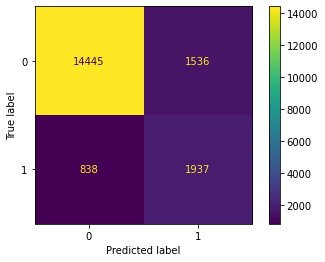

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test.to_numpy(), y_test.to_numpy())  

In [ ]:
[i[0] for i in model.predict_proba(X_test)]

array([[0.34937012, 0.6506299 ],
       [0.6380037 , 0.36199632],
       [0.7997135 , 0.20028651],
       ...,
       [0.21391946, 0.78608054],
       [0.7431307 , 0.25686935],
       [0.7234678 , 0.27653214]], dtype=float32)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test.to_numpy(), predicted)}")
print(f"Precision: {precision_score(y_test.to_numpy(), predicted)}")
print(f"Recall: {recall_score(y_test.to_numpy(), predicted)}")
print(f"F1-score: {f1_score(y_test.to_numpy(), predicted)}")
print(f"ROCAUC-score: {roc_auc_score(y_test.to_numpy(), [i[1] for i in model.predict_proba(X_test.to_numpy())])}")

Accuracy: 0.8734271699722755
Precision: 0.5577310682407141
Recall: 0.698018018018018
F1-score: 0.6200384122919335
ROCAUC-score: 0.8909895140118531


Oversampling training set

In [ ]:
from imblearn.over_sampling import RandomOverSampler

print(Counter(y_train))
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
print(Counter(y_train_over))

Counter({0: 32660, 1: 5419})
Counter({0: 32660, 1: 32660})


In [ ]:
model_over = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
model_over.fit(X_train_over, y_train_over)
model_over.score(X_test, y_test)

0.8420238856899126

In [ ]:
predicted_over = model_over.predict(X_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, predicted_over)}")
print(f"Precision: {precision_score(y_test, predicted_over)}")
print(f"Recall: {recall_score(y_test, predicted_over)}")
print(f"F1-score: {f1_score(y_test, predicted_over)}")

Accuracy: 0.8420238856899126
Precision: 0.4788858939802336
Recall: 0.7682882882882883
F1-score: 0.590009685900097


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


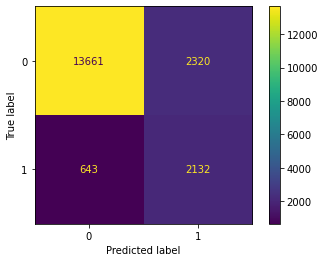

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_over, X_test, y_test)  

In [ ]:
X_train.shape

(38079, 46)

Train XGBoost with Standerdisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
oversample = SMOTE()
X_train_smote_scaled, y_train_smote_scaled = oversample.fit_resample(X_train_scaled, y_train)
# summarize the new class distribution
counter = Counter(y_train_smote_scaled)
print(counter)

In [ ]:
model_smote_scaled = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
model_smote_scaled.fit(X_train_smote_scaled, y_train_smote_scaled)
model_smote_scaled.score(X_test_scaled, y_test)

0.8506078055022392

In [ ]:
predicted_smote_scaled = model_smote_scaled.predict(X_test_scaled)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, predicted_smote_scaled)}")
print(f"Precision: {precision_score(y_test, predicted_smote_scaled)}")
print(f"Recall: {recall_score(y_test, predicted_smote_scaled)}")
print(f"F1-score: {f1_score(y_test, predicted_smote_scaled)}")

Accuracy: 0.8506078055022392
Precision: 0.49677881173944166
Recall: 0.7502702702702703
F1-score: 0.5977605512489234


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


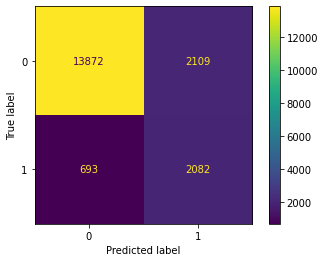

In [ ]:
plot_confusion_matrix(model_smote_scaled, X_test_scaled, y_test) 

Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
#rfc.fit(X_train_smote, y_train_smote)

In [ ]:
rfc.score(X_test, y_test)

0.8950735764555342

In [ ]:
predicted_rfc = rfc.predict(X_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, predicted_rfc)}")
print(f"Precision: {precision_score(y_test, predicted_rfc)}")
print(f"Recall: {recall_score(y_test, predicted_rfc)}")
print(f"F1-score: {f1_score(y_test, predicted_rfc)}")

Accuracy: 0.8950735764555342
Precision: 0.6473165388828039
Recall: 0.6389189189189189
F1-score: 0.6430903155603918


In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc, X_test, y_test) 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [100, 200, 300]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(n_estimators=100, random_state=42), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42,)
rf_random.fit(X_train_smote, y_train_smote)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  14.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.1s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  20.6s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  20.6s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  20.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   random_state=42, verbose=2)

In [ ]:
import pickle
filename = 'grid_search_rfc.sav'
pickle.dump(rf_random, open(f"/content/gdrive/My Drive/BT4222/{filename}", 'wb'))

In [ ]:
print(rf_random.best_params_)


{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}


#Random Forest Hyperparameter Tuned

In [ ]:
rfc_tuned = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=30, bootstrap=False, random_state=42)
rfc_tuned.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       n_estimators=200, random_state=42)

In [ ]:
rfc_tuned.score(X_test, y_test)
rfc_tuned_predicted = rfc_tuned.predict(X_test)

In [ ]:
import pickle
filename = 'model_rfc_tuned.sav'
pickle.dump(rfc_tuned, open(f"/content/drive/MyDrive/BT4222/models/{filename}", 'wb'))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc_tuned_predicted))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     15981
           1       0.66      0.63      0.64      2775

    accuracy                           0.90     18756
   macro avg       0.80      0.79      0.79     18756
weighted avg       0.90      0.90      0.90     18756



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


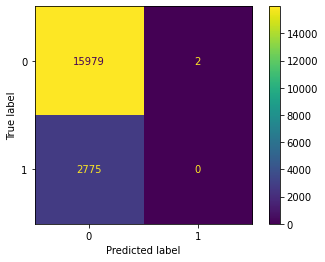

In [ ]:
plot_confusion_matrix(rfc_tuned, X_test, y_test) 

Random Forest with Scaling

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('rfc', rfc_tuned)])
pipe.fit(X_train_smote, y_train_smote)
pipe.score(X_test, y_test)

0.8967796971635743

In [ ]:
pipe_predicted = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pipe_predicted))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     15981
           1       0.66      0.63      0.64      2775

    accuracy                           0.90     18756
   macro avg       0.80      0.79      0.79     18756
weighted avg       0.90      0.90      0.90     18756



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


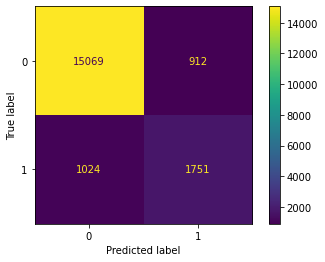

In [ ]:
plot_confusion_matrix(pipe, X_test, y_test) 

Hyperparameter Tuning of Scaled Set

In [ ]:
#Scaling
scaler = MinMaxScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rfc_temp = RandomForestClassifier(n_estimators=250, random_state=42, min_samples_leaf=2, max_features='sqrt')
rfc_temp.fit(X_train_smote_scaled, y_train_smote)
rfc_temp.score(X_test_scaled, y_test)

0.8948069950949029

In [ ]:
rf_random_scaled = RandomizedSearchCV(estimator = RandomForestClassifier(n_estimators=100, random_state=42), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42,)
rf_random_scaled.fit(X_train_smote_scaled, y_train_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  34.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  35.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  37.3s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  32.1s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  32.7s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  31.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2

In [ ]:
rf_random_scaled.best_params_

Gradient Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#clf_ada = AdaBoostClassifier(n_estimators=300, random_state=42)
#clf_ada.fit(X_train_smote, y_train_smote)
#clf_ada.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=300, random_state=42).fit(X_train_smote, y_train_smote)
clf.score(X_test, y_test)

0.8873427169972276

In [ ]:
predicted_gb = clf.predict(X_test)

In [ ]:
print(classification_report(y_test,predicted_gb))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     15981
           1       0.60      0.70      0.65      2775

    accuracy                           0.89     18756
   macro avg       0.77      0.81      0.79     18756
weighted avg       0.90      0.89      0.89     18756



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


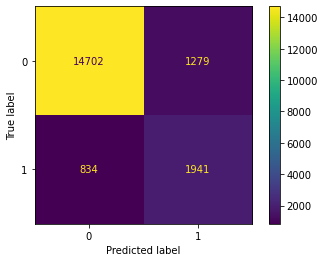

In [ ]:
plot_confusion_matrix(clf, X_test, y_test) 

Gradient Boosting with Scaling




In [ ]:
pipe_v2 = Pipeline([('scaler', MinMaxScaler()), ('gb', clf)])
pipe_v2.fit(X_train_smote, y_train_smote)
pipe_v2.score(X_test, y_test)

0.88744934954148

In [ ]:
predicted_gb_scaled = pipe_v2.predict(X_test)
print(classification_report(y_test,predicted_gb_scaled))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     15981
           1       0.60      0.70      0.65      2775

    accuracy                           0.89     18756
   macro avg       0.77      0.81      0.79     18756
weighted avg       0.90      0.89      0.89     18756



In [ ]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[
        ('gb', GradientBoostingClassifier(n_estimators=300, random_state=42)),
         ('rfc', RandomForestClassifier(n_estimators=300, random_state=42)),
          ('ada', AdaBoostClassifier(n_estimators=300, random_state=42))], voting='soft')
eclf1.fit(X_train_smote, y_train_smote)


VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(n_estimators=300,
                                                         random_state=42)),
                             ('rfc',
                              RandomForestClassifier(n_estimators=300,
                                                     random_state=42)),
                             ('ada',
                              AdaBoostClassifier(n_estimators=300,
                                                 random_state=42))],
                 voting='soft')

In [ ]:
eclf1.score(X_test, y_test)
voting_predict = eclf1.predict(X_test)

In [ ]:
print(classification_report(y_test,voting_predict))

In [ ]:
import pickle
filename = 'model_ensembled_tuned.sav'
pickle.dump(eclf1, open(f"/content/drive/MyDrive/BT4222/models/{filename}", 'wb'))

Random Forest Classification with Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
scaler = MinMaxScaler()
X_train_over_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rfc_over = RandomForestClassifier(n_estimators=300, random_state=42, max_features='sqrt')
rfc_over.fit(X_train_over_scaled, y_train_over)


RandomForestClassifier(max_features='sqrt', n_estimators=300, random_state=42)

In [ ]:
rfc_over.score(X_test_scaled, y_test)

0.9114949882704201

In [ ]:
predicted_rfc_over = rfc_over.predict(X_test_scaled)

In [ ]:
predicted_rfc_over

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_rfc_over))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     15981
           1       0.73      0.63      0.68      2775

    accuracy                           0.91     18756
   macro avg       0.84      0.80      0.81     18756
weighted avg       0.91      0.91      0.91     18756



In [ ]:
rfc_over_tuned = RandomForestClassifier(n_estimators=3000, random_state=42)
rfc_over_tuned.fit(X_train_over_scaled, y_train_over)
rfc_over_tuned.score(X_test_scaled, y_test)

0.9121880998080614

In [ ]:
import pickle
filename = 'rfc_over_tuned.sav'
pickle.dump(rfc_over_tuned, open(f"/content/drive/MyDrive/BT4222/models/{filename}", 'wb'))

In [ ]:
predicted_rfc_over = rfc_over.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,predicted_rfc_over))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     15981
           1       0.73      0.63      0.68      2775

    accuracy                           0.91     18756
   macro avg       0.84      0.80      0.81     18756
weighted avg       0.91      0.91      0.91     18756



Can try Extremely Randomized Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf_extra = ExtraTreesClassifier(n_estimators=3000, random_state=42)
clf_extra.fit(X_train_over_scaled, y_train_over)
clf_extra.score(X_test_scaled, y_test)

In [ ]:
import pickle
filename = 'rfc_over_extra.sav'
pickle.dump(rfc_over_tuned, open(f"/content/drive/MyDrive/BT4222/models/{filename}", 'wb'))

In [ ]:
predicted_rfc_over_extra = clf_extra.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,predicted_rfc_over_extra))

Ensemble

In [ ]:
eclf2 = VotingClassifier(estimators=[
        ('gb', GradientBoostingClassifier(n_estimators=3000, random_state=42)),
         ('rfc', RandomForestClassifier(n_estimators=3000, random_state=42)),
          ('etc', ExtraTreesClassifier(n_estimators=3000, random_state=42))], voting='soft')
eclf2.fit(X_train_over_scaled, y_train_over)

VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(n_estimators=3000,
                                                         random_state=42)),
                             ('rfc',
                              RandomForestClassifier(n_estimators=3000,
                                                     random_state=42)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=3000,
                                                   random_state=42))],
                 voting='soft')

In [ ]:
import pickle
filename = 'ensembled_over.sav'
pickle.dump(eclf2, open(f"/content/drive/MyDrive/BT4222/models/{filename}", 'wb'))

In [ ]:
#filename = 'ensembled_over.sav'
#eclf2 = pickle.load(open(f"/content/drive/MyDrive/BT4222/models/{filename}", 'rb'))

In [ ]:
eclf2.score(X_test_scaled, y_test)

0.9141074856046065

In [ ]:
predicted_eclf2 = eclf2.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,predicted_eclf2))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     15981
           1       0.72      0.69      0.70      2775

    accuracy                           0.91     18756
   macro avg       0.83      0.82      0.83     18756
weighted avg       0.91      0.91      0.91     18756



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


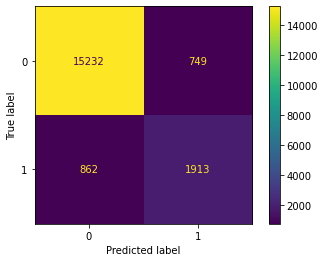

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(eclf2, X_test_scaled, y_test) 

In [ ]:
#Give ROC AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, eclf2.predict_proba(X_test_scaled)[:, 1])

0.9395028443123055

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


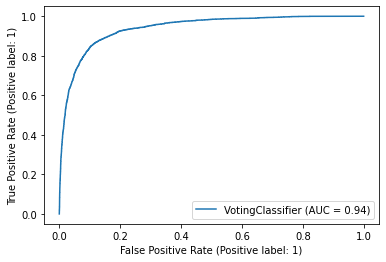

In [ ]:
from sklearn import datasets, metrics
metrics.plot_roc_curve(eclf2, X_test_scaled, y_test) 

Training Set Score

In [ ]:
eclf2.score(X_train_over_scaled, y_train_over)

1.0

In [ ]:
X_test

,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,r&b,rap,rock,soft rock,southern hip hop,trap,urban contemporary,average_year_success,is_success,bert_dense_lyrics
36072,8,0.309,0.928,7,-2.187,0,0.1600,0.393000,0.000000,0.3400,...,0,0,0,0,0,0,0,26,1,0.614289
20550,5,0.625,0.852,0,-5.314,1,0.0788,0.004380,0.005070,0.2580,...,1,0,0,0,0,0,1,-1,0,0.573500
38287,6,0.555,0.639,10,-6.291,0,0.0242,0.316000,0.000002,0.1820,...,0,0,0,0,0,0,0,-1,0,0.572983
50245,2,0.723,0.636,0,-7.011,1,0.0648,0.235000,0.389000,0.0680,...,0,0,0,0,0,0,0,-1,0,0.577553
13371,5,0.825,0.766,1,-7.306,1,0.2960,0.027900,0.000000,0.1480,...,0,1,0,0,0,0,0,-1,0,0.679667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15044,3,0.378,0.817,2,-6.060,1,0.0372,0.000654,0.000000,0.1170,...,0,0,0,0,0,0,0,-1,0,0.579702
32880,4,0.317,0.857,6,-5.468,1,0.0605,0.036600,0.000001,0.1350,...,0,0,1,0,0,0,0,-1,0,0.588688
54943,7,0.848,0.591,11,-5.273,1,0.0620,0.379000,0.000000,0.1010,...,0,1,0,0,0,1,0,60,1,0.626926
24825,3,0.597,0.675,4,-8.229,1,0.0635,0.142000,0.000000,0.1680,...,0,0,0,0,0,0,0,-1,0,0.540868


Naive checking

In [ ]:
accuracy_score(X_test["is_success"], y_test)